###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2020 Adam Wickenheiser

# Lab 1: Free Response of a Second-Order System

Type name here

Monday 1:25pm section

Table #

## Contents:

1. [Pre-lab Questions](#prelab)
1. [Lab Procedure](#lab)
1. [Post-lab Questions](#postlab)
1. [Submissions](#sub)

### Learning Objectives

1. Capture displacement data from an encoder, translate it to physical coordinates, and plot a time history
2. Apply curve fit and peak finding algorithms to experimental data
3. Estimate natural frequency \\(\omega_n\\) and damping ratio \\(\zeta\\) from free response data

<a id='prelab'></a>

### Pre-lab Questions

This lab concerns a simple, yet representative, mechanical system: the mass-spring-damper system shown below.  A free-body-diagram (FBD) of this system appears to the right.

<img src="mass spring damper.png" width="600" />

We will see that all second-order linear systems can be written equivalently as a mass-spring-damper system.  This means that you can build a mass-spring-damper system that will exhibit the same dynamic behavior as any second-order system.

The equation of motion (EOM) for this system derived using Newton's Second Law is as follows:

\\(m \ddot{x} = \sum F_x = -b \dot{x} - kx + F\\)

which can be rewritten as

\\(m \ddot{x} + b \dot{x} + kx = F\\)

If we divide this equation through by \\(m\\), then we arrive at the following *canonical form*:

\\(\ddot{x} + 2 \zeta \omega_n \dot{x} + \omega_n^2 = \dfrac{F}{m}\\)

where \\(\zeta\\) is the [damping ratio](https://en.wikipedia.org/wiki/Damping_ratio) and \\(\omega_n\\) is the 
[natural frequency](https://en.wikipedia.org/wiki/Simple_harmonic_motion#Dynamics).

In this lab, we will focus on the free response of this system.  What this means is that the system will be given an initial condition (in this case, an initial deflection), and then released to oscillate freely.  Hence, we can consider the external force to be \\(F = 0\\), and write

\\(\ddot{x} + 2 \zeta \omega_n \dot{x} + \omega_n^2 = 0\\)

Solving this equation of motion (EOM) gives

\\(x(t) = A e^{-\zeta \omega_n t} \cos(\omega_d t + \phi)\\)

where \\(\omega_d = \omega_n \sqrt{1-\zeta^2}\\) is the damped natural frequency.  The amplitude \\(A\\) and phase angle \\(\phi\\) are functions of the initial conditions.

Let's plot this function in Python with some different values for the parameters:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

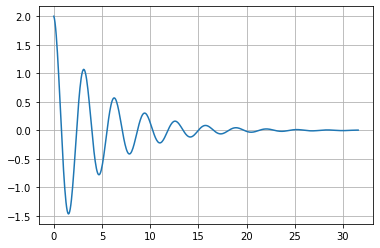

In [2]:
zeta = 0.1  # damping ratio
w_n = 2     # natural frequency (rad/s)
w_d = w_n*np.sqrt(1-zeta**2) # damped natural frequency (rad/s)
X = 2
phi = 0
t = np.linspace(0,2*np.pi/w_d*10,501)   # plot for 10 periods
x = X*np.exp(-zeta*w_n*t)*np.cos(w_d*t+phi)
plt.plot(t,x)
plt.grid(True);

**Problem 1 (10 points):**

Copy the previous code into the next cell and modify it to produce the following curve.  Note the effect each parameter has on the response.  Try to get as close to matching this plot as you reasonably can (doesn't have to be exact).

<img src="ex free response.png" width="500" />

Now, let's load a data file like the one you will be acquiring during the lab.  Check out the file `test1.txt`, and place it in the same folder as this Python notebook.  In this lab, we will only use the columns 'Time' and 'Encoder 1 Pos'.  'Time' is a list of time stamps when the data is acquired.  The data in the rest of the columns is collected simultaneously at each time stamp.  'Encoder 1 Pos' is the output of the encoder that is used to measure the position of the cart.

The following code loads the text file using [numpy.genfromtext](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html), which is a generic function for reading in text files.  Because it only handles rows with consistent formatting, we have to ignore the first two rows and the last one.  We also have to ignore the `;` that appears at the end of each row.

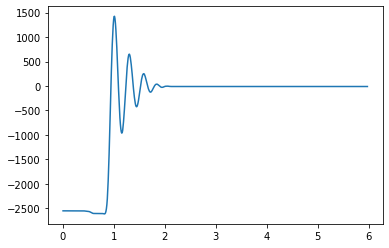

In [3]:
# read data from text file, skipping first 2 rows and last row, ignore ';'
data = np.genfromtxt('test1.txt',comments=';',skip_header=3,skip_footer=1)
t = data[:,1]     # time is column 1
x = data[:,3]     # position is column 3 (recall column numbering starts at 0)
plt.plot(t,x);

For the last part of the pre-lab, we want to be able to idenfity the peaks (local maxima) of the response.  The x- and y-coordinates of the peaks will be used to calculate the natural frequency \\(\omega_n\\) and the damping ratio \\(\zeta\\).  These parameters, along with the initial conditions, fully describe the free response of a second-order linear system.

To find the peaks, we will use the function [scipy.signal.find_peaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html).  Check out the bottom of that webpage for some examples of usage.

**Problem 2 (10 points):**

Use the `find_peaks` function to identify and plot the peaks of your response.  Try to replicate the following figure:

<img src="ex free response w peaks.png" width="500" />

In [4]:
from scipy.signal import find_peaks

<a id='lab'></a>

### Lab Procedure

In this experiment, you will displace part of a mass-spring-damper system a certain distance, and then record the position of the cart over time after it is released. There will be 10 trials altogether, according to the following table:


<table>
  <tr>
    <th style='text-align: center'>Trial</th>
    <th style='text-align: center'>Number of Added Masses</th>
    <th style='text-align: center'>Added Mass [kg]</th>
    <th style='text-align: center'>Initial Displacement [cm]</th>
  </tr>
  <tr>
    <td style='text-align: center'>1</td>
    <td style='text-align: center'>1</td>
    <td style='text-align: center'>0.490</td>
    <td style='text-align: center'>1</td>
  </tr>
  <tr>
    <td style='text-align: center'>2</td>
    <td style='text-align: center'>1</td>
    <td style='text-align: center'>0.490</td>
    <td style='text-align: center'>1.5</td>
  </tr>  <tr>
    <td style='text-align: center'>3</td>
    <td style='text-align: center'>1</td>
    <td style='text-align: center'>0.490</td>
    <td style='text-align: center'>2</td>
  </tr>  <tr>
    <td style='text-align: center'>4</td>
    <td style='text-align: center'>1</td>
    <td style='text-align: center'>0.490</td>
    <td style='text-align: center'>2.5</td>
  </tr>  <tr>
    <td style='text-align: center'>5</td>
    <td style='text-align: center'>1</td>
    <td style='text-align: center'>0.490</td>
    <td style='text-align: center'>3</td>
  </tr>  <tr>
    <td style='text-align: center'>6</td>
    <td style='text-align: center'>2</td>
    <td style='text-align: center'>0.980</td>
    <td style='text-align: center'>1</td>
  </tr>  <tr>
    <td style='text-align: center'>7</td>
    <td style='text-align: center'>2</td>
    <td style='text-align: center'>0.980</td>
    <td style='text-align: center'>1.5</td>
  </tr>  <tr>
    <td style='text-align: center'>8</td>
    <td style='text-align: center'>2</td>
    <td style='text-align: center'>0.980</td>
    <td style='text-align: center'>2</td>
  </tr>  <tr>
    <td style='text-align: center'>9</td>
    <td style='text-align: center'>2</td>
    <td style='text-align: center'>0.980</td>
    <td style='text-align: center'>2.5</td>
  </tr>  <tr>
    <td style='text-align: center'>10</td>
    <td style='text-align: center'>2</td>
    <td style='text-align: center'>0.980</td>
    <td style='text-align: center'>3</td>
  </tr>
</table>

If your setup does not allow the full 3 cm range of motion, just use 5 different starting positions within the allowable range.

Each trial will proceed as follows:

1. Open the ECP Executive software from the desktop icon. Go to *Command > Trajectory*, select *step*, then click *Setup*. Choose *Open Loop Step* and set *step size* = 0, *dwell time* = 3000, *number of reps* = 1. Click *OK* and close the window, then click *OK* again to close the next window.

2. Go to *Command > Execute* and choose *Normal Data Sampling*. On the physical setup, displace cart 1 the appropriate distance according to the trial #. Click *Run* and release the cart approximately 1 second later (to make sure you acquire the whole oscillation). Take care not to bump the limit switches, as doing so will abort the data recording.

3. Go to *Plotting > Setup Plot*. Choose *encoder 1 position* only in the left axis box, then click plot data. The plot will show the damped oscillations of the cart. Take a screenshot and save the image of the plot with an appropriate filename for potential inclusion in your post-lab analysis. The plot is intended to give you a qualitative feel for how the system responds and to compare with the data you read from the text file. The actual data processing will be done after you collect all the data.

4.	Go to *Data > Export raw data*. Pick an appropriate file name, and export the data somewhere you can access it later (portable memory drive/USB stick, Google Drive, etc.). Close the ECP software after all trials are done.

<a id='postlab'></a>

### Post-lab Questions

Once you've gathered all the experimental data, the post-processing steps are directed towards estimating the parameters of the system, namely natural frequency \\(\omega_n\\) and damping ratio \\(\zeta\\).  From the pre-lab, you can see that the response depends on these parameters; the natural frequency most clearly affects the frequency of oscillation, and the damping ratio most clearly affects the rate of decay of the amplitude.

The following steps will guide you in analyzing your data and using this analysis to estimate \\(\omega_n\\) and \\(\zeta\\).  You will then verify these estimates are correct by comparing your experimental responses to simulated ones.

1. Load your data file, determine the peaks, and plot the response with labeled peaks, as you did with the example data file in the pre-lab.

2. Estimate the period $T$ of the oscillations.  By using multiple pairs of consecutive peaks, you can report the mean and standard deviation (uncertainty) of $T$.

3. To estimate the damping ratio \\(\zeta\\), you will first estimate how quickly the oscillations decay.

Let's look at the ratio of the first peak's amplitude \\(x_1\\) and the next peak's amplitude \\(x_2\\).  Suppose that the first peak occurs at \\(t = t_1\\) and the next peak occurs at \\(t = t_2\\).  Then

\\(\dfrac{x_1}{x_2} = \dfrac{X e^{-\zeta \omega_n t_1} \cos(\omega_d t_1 + \phi)}{X e^{-\zeta \omega_n t_2} \cos(\omega_d t_2 + \phi)} = \dfrac{e^{-\zeta \omega_n t_1} \cos(\omega_d t_1 + \phi)}{e^{-\zeta \omega_n (t_1 + T)} \cos(\omega_d (t_1 + T + \phi)} = \dfrac{e^{-\zeta \omega_n t_1}}{e^{-\zeta \omega_n t_1} e^{-\zeta \omega_n T}} = e^{\zeta \omega_n T}\\)

Let's define the [logarithmic decrement](https://en.wikipedia.org/wiki/Logarithmic_decrement) as

\\(\delta = \ln{\left(\dfrac{x_1}{x_2}\right)} \:\:\:\:\:(1)\\)

Then \\(\delta = \zeta \omega_n T = \zeta \omega_n \dfrac{2 \pi}{\omega_d} = \zeta \omega_n \dfrac{2 \pi}{\omega_n \sqrt{1-\zeta^2}} = \zeta \dfrac{2 \pi}{\sqrt{1-\zeta^2}}\\)

Now, we can solve for \\(\zeta\\) in terms of \\(\delta\\), which can be measured from the peaks:

\\(\zeta = \dfrac{1}{\sqrt{1 + \left(\frac{2 \pi}{\delta} \right)^2}} \:\:\:\:\:(2)\\)

Write a code to calculate $\delta$ using equation (1) and the peaks of your data, then calculate $\zeta$ using equation (2).

Again, use multiple pairs of consecutive peaks to calculate mean and standard deviations for $\delta$ and $\zeta$.

4. From your estimates of \\(T\\) and \\(\zeta\\), you can now estimate \\(\omega_n\\) using the following formula:

\\(\omega_n = \dfrac{\omega_d}{\sqrt{1-\zeta^2}} = \dfrac{2 \pi}{\tau_d \sqrt{1-\zeta^2}}\\)

Output the mean and standard deviation of $\omega_n$.

5. For each trial (data set), repeat steps 1-4.  Gather your calculated values for \\(\zeta\\) and \\(\omega_n\\) into an array to use in the subsequent steps.  You don't have to use a for loop; you can manually enter the values into the array.  You do not have to produce plots for each data set, but this might be helpful to see if the peaks are being found correctly.

6. Calculate the average \\(\zeta\\) and \\(\omega_n\\) for each Added Mass (average over trials 1-5 and then average over trials 6-10).  You should see that the values for trials 1-5 are similar to each other, and the same for trials 6-10.

7. We next want to estimate the physical parameters mass \\(m\\), damping constant \\(b\\), and the spring constant \\(k\\).  We will need more data than just \\(\zeta\\) and \\(\omega_n\\) however (2 equations and 3 unknowns!).

The purpose of running trials with two different masses was to give us another equation to work with.  The mass \\(m\\) 	consists of several components in addition to the actual added mass (the metal weights you attached to the cart): the cart, armature, and other motor components all contribute to the system mass.  We will call the combined mass of the cart, armature, motor, etc, \\(m_c\\), and express \\(m\\) as the sum of this \\(m_c\\) and the added mass (\\(m_w\\)) which we assume to know precisely as 0.490 kg or 0.980 kg:

\\(m = m_c + m_w\\)

From the definition of natural frequency, we have \\(\omega_n = \sqrt{\dfrac{k}{m}}\\)

Thus, \\(\left( \dfrac{\overline{\omega_{n1}}}{\overline{\omega_{n2}}} \right)^2 = \dfrac{\dfrac{k}{m_c + m_{w1}}}{\dfrac{k}{m_c + m_{w2}}} = \dfrac{m_c + m_{w2}}{m_c + m_{w1}}\\)

where \\(\overline{\omega_{n1}}\\) is the average natural frequency for trials 1-5, and \\(\overline{\omega_{n2}}\\) is the average natural frequency for trials 6-10.

Use these equations to calculate \\(m_c\\) in the code cell below.  You can then calculate the total mass $m$ for trials 1-5 (when there was one added mass) and the total mass for trials 6-10 (when there were two added masses).

8. We can now estimate the damping constant \\(b\\) from the formula

\\(b = 2 m \overline{\zeta} \overline{\omega_n}\\)

You will get two different values for $b$ for trials 1-5 and for trials 6-10.

How do you account for the differences in the values for \\(b\\) between trials 1-5 and trials 6-10?

9. Finally, we can estimate the spring constant \\(k\\) from the formula

\\(k = m \overline{\omega_n}^2\\)

Again, you will get two different values of $k$.  How do you account for any differences?

<a id='sub'></a>

## Submissions

Please submit the following on Canvas:

1. Your completed Jupyter notebook (this file)
2. All data (.txt) files
3. All screen captures

Please label your data files and screen captures in a logical manner so that they can be correlated by the grader.